In [150]:
import pandas as pd
%matplotlib inline
df1=pd.read_csv('C:/Users/santo/Desktop/HackathonFall2018/Drug_2013_Missouri.csv')
df2=pd.read_csv('C:/Users/santo/Desktop/HackathonFall2018/Drug_2014_Missouri.csv')
df3=pd.read_csv('C:/Users/santo/Desktop/HackathonFall2018/Drug_2015_Missouri.csv')



In [159]:
frames=[df1, df2, df3]
df=pd.concat(frames)

In [161]:
df.tail()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Suppression Used,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
70746,FFSU,MO,63304,459,30,2015,3,ONDANSETRO,False,8627.0,238.0,5975.46,5975.46,0.00,7/1,07/01/2015 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",63304045930
70747,FFSU,MO,63323,278,10,2015,4,VINBLASTIN,False,845.0,79.0,2853.70,2549.37,304.33,10/1,10/01/2015 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",63323027810
70748,FFSU,MO,51079,991,1,2015,3,TRAMADOL H,False,255.5,199.0,211.44,211.44,0.00,7/1,07/01/2015 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",51079099101
70749,FFSU,MO,409,4699,30,2015,4,PROPOFOL,False,3161.0,212.0,2123.43,2120.08,3.35,10/1,10/01/2015 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",409469930
70750,FFSU,MO,409,9094,22,2015,4,FENTANYL C,False,5040.0,2177.0,20242.60,19973.69,268.91,10/1,10/01/2015 12:00:00 AM,38.4623,-92.302,"(38.4623, -92.302)",409909422


In [162]:
df.columns

Index(['Utilization Type', 'State', 'Labeler Code', 'Product Code',
       'Package Size', 'Year', 'Quarter', 'Product Name', 'Suppression Used',
       'Units Reimbursed', 'Number of Prescriptions',
       'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Quarter Begin', 'Quarter Begin Date',
       'Latitude', 'Longitude', 'Location', 'NDC'],
      dtype='object')

In [163]:
df.dropna(inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113970 entries, 8 to 70750
Data columns (total 20 columns):
Utilization Type                  113970 non-null object
State                             113970 non-null object
Labeler Code                      113970 non-null int64
Product Code                      113970 non-null int64
Package Size                      113970 non-null int64
Year                              113970 non-null int64
Quarter                           113970 non-null int64
Product Name                      113970 non-null object
Suppression Used                  113970 non-null bool
Units Reimbursed                  113970 non-null float64
Number of Prescriptions           113970 non-null float64
Total Amount Reimbursed           113970 non-null float64
Medicaid Amount Reimbursed        113970 non-null float64
Non Medicaid Amount Reimbursed    113970 non-null float64
Quarter Begin                     113970 non-null object
Quarter Begin Date                113

In [177]:
# highest frequency of product
df['Product Name'].value_counts()[:10]

LISINOPRIL    1518
QUETIAPINE    1155
RISPERIDON    1102
GABAPENTIN    1086
OLANZAPINE    1054
AMOXICILLI    1028
HYDROCODON    1003
ALPRAZOLAM     946
METOPROLOL     938
AMLODIPINE     909
Name: Product Name, dtype: int64

In [166]:
df=df[['Latitude','Longitude','Medicaid Amount Reimbursed','Number of Prescriptions','Product Name','Quarter','Year']]

In [167]:
df.tail()

,Latitude,Longitude,Medicaid Amount Reimbursed,Number of Prescriptions,Product Name,Quarter,Year
70746,38.4623,-92.302,5975.46,238.0,ONDANSETRO,3,2015
70747,38.4623,-92.302,2549.37,79.0,VINBLASTIN,4,2015
70748,38.4623,-92.302,211.44,199.0,TRAMADOL H,3,2015
70749,38.4623,-92.302,2120.08,212.0,PROPOFOL,4,2015
70750,38.4623,-92.302,19973.69,2177.0,FENTANYL C,4,2015


In [168]:
df1=df[(df.Quarter == 1)]
df1.head()
df1['Medicaid Amount Reimbursed'].sum()

815957736.00999999

In [169]:
df2=df[(df.Quarter == 2)]
df2.head()
df2['Medicaid Amount Reimbursed'].sum()

824171290.68000007

In [170]:
df3=df[(df.Quarter == 3)]
df3.head()
df3['Medicaid Amount Reimbursed'].sum()

857985794.26999998

In [171]:
df4=df[(df.Quarter == 4)]
df4.head()
df4['Medicaid Amount Reimbursed'].sum()

850939089.41000009

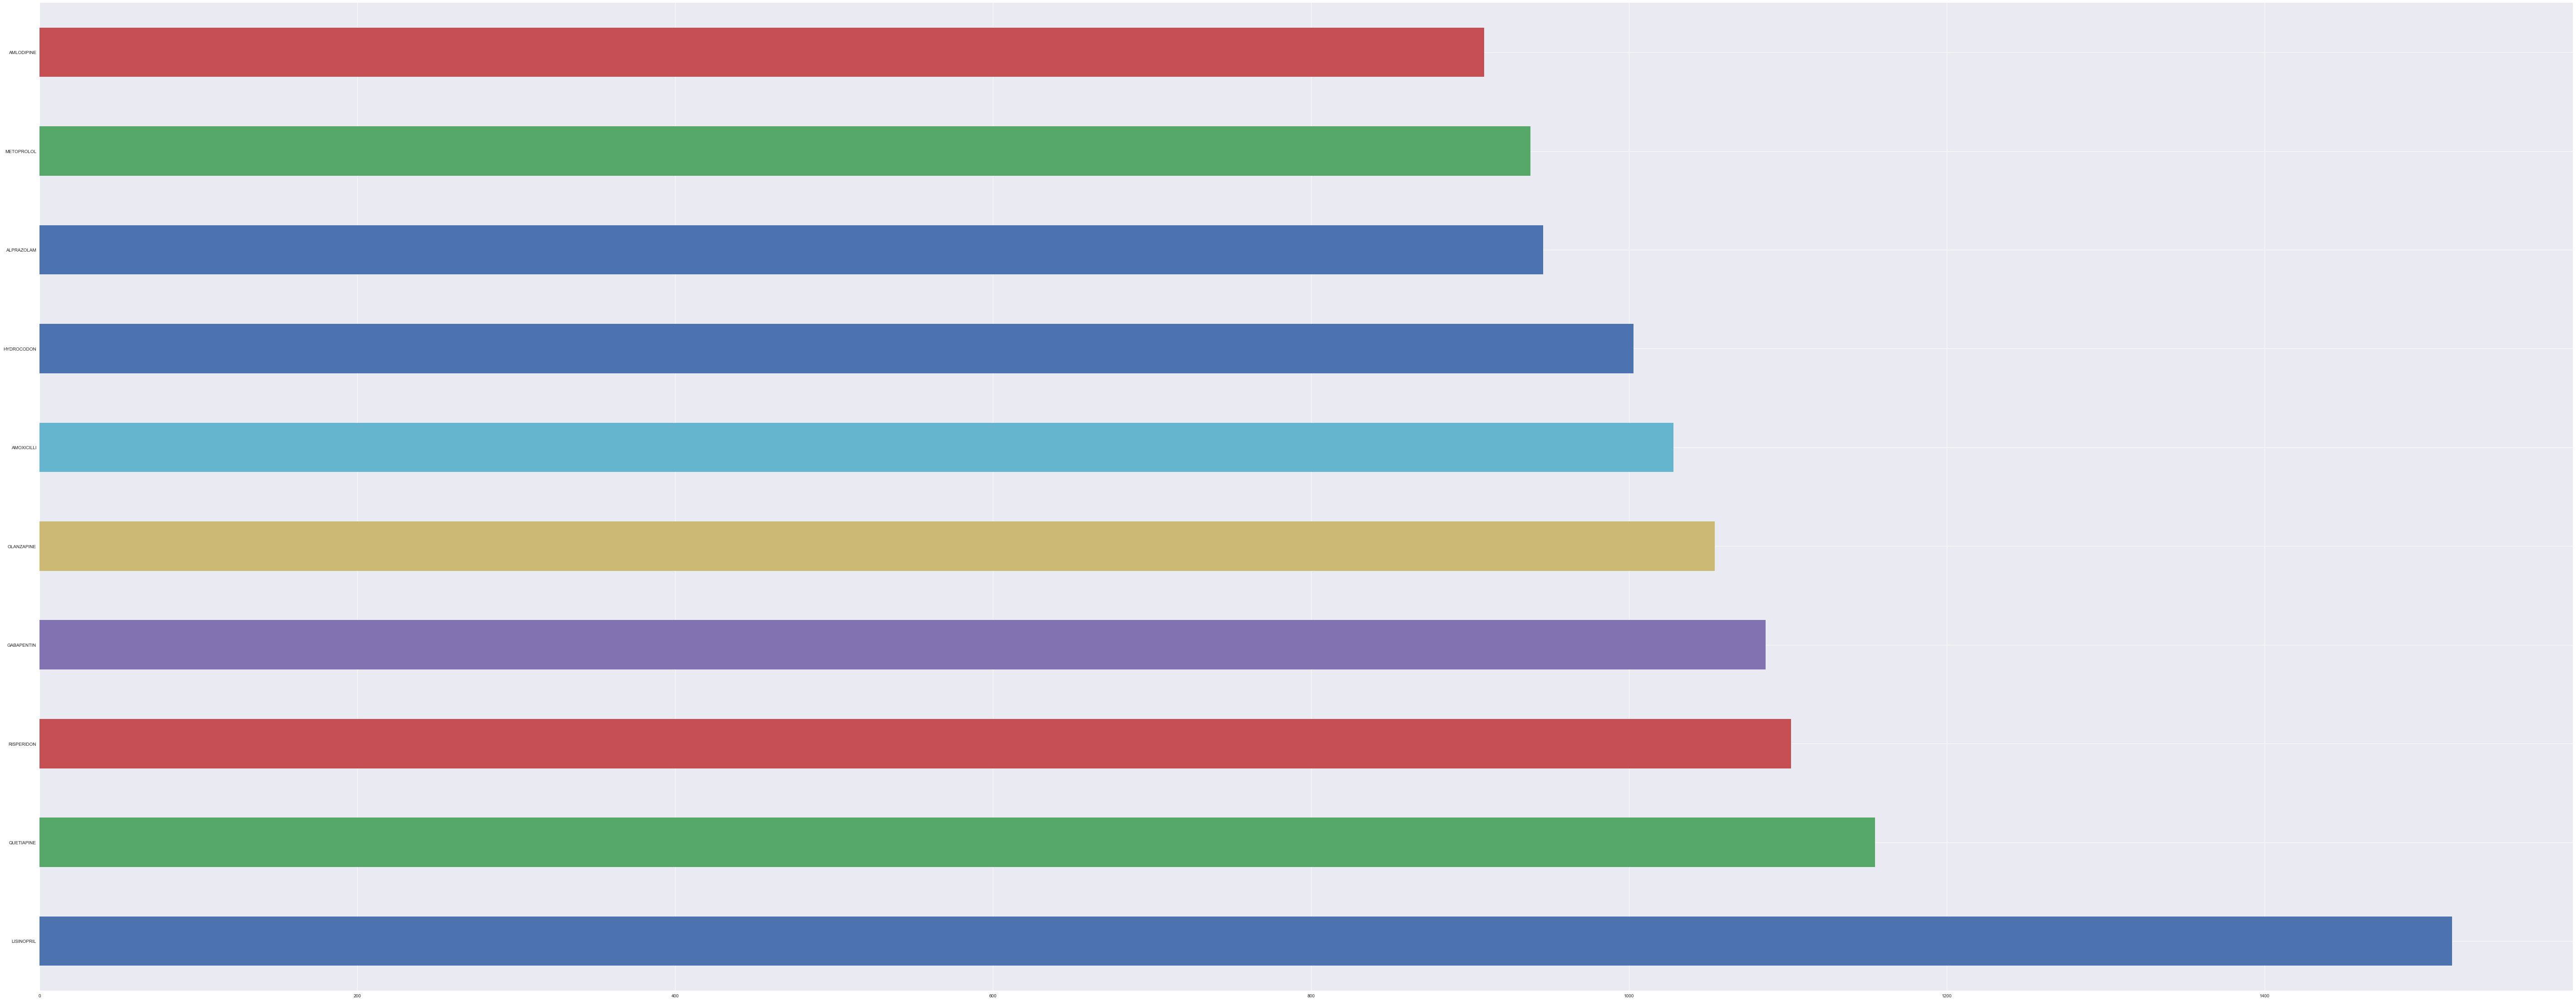

In [178]:
%matplotlib inline
df['Product Name'].value_counts()[:10].plot(kind='barh',figsize=(100,40))

In [173]:
df.to_excel('MOmed.xlsx')
print('Done')

Done


In [174]:
cordata=df[['Number of Prescriptions','Medicaid Amount Reimbursed','Quarter']]

In [175]:
corr=cordata.corr()

In [179]:
print(corr)


                            Number of Prescriptions  \
Number of Prescriptions                    1.000000   
Medicaid Amount Reimbursed                 0.383945   
Quarter                                   -0.000009   

                            Medicaid Amount Reimbursed   Quarter  
Number of Prescriptions                       0.383945 -0.000009  
Medicaid Amount Reimbursed                    1.000000  0.001082  
Quarter                                       0.001082  1.000000  
